In [1]:
# Importing required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import nltk
import re
import string
#from itertools import chain
from collections import Counter
from wordcloud import WordCloud
import gensim
from scipy.stats.morestats import yeojohnson_normplot


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:
# All required import downloads for error free execution

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Exploring Fake news dataset

In [3]:
# Reading csv file for fake data values

fake = pd.read_csv("/content/drive/MyDrive/UMKC_PDS/Fake.csv")

In [4]:
# Displaying head for fake data values

fake.head(3)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017

In [5]:
# Column names in fake dataset

fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
# Displaying number of unique values under subject column

fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [7]:
# Checking if there are any NA (null) values in fake data

pd.isna(fake).sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
# Displaying subject column split in fake data

# df= true_data.title()
fake_dt_fig = px.pie(fake,names='subject')
fake_dt_fig.show()

In [9]:
# Visualizing histogram values for subject column and split of all unique categories in this column.

px.histogram(fake, x="subject", barmode="group")

In [10]:
# Finding out 100 most common words in fake text column.

commonFake = Counter(" ".join(fake["text"]).split()).most_common(100)
commonFake

[('the', 483203),
 ('to', 286028),
 ('of', 233193),
 ('and', 213059),
 ('a', 202870),
 ('in', 152840),
 ('that', 138416),
 ('s', 127621),
 ('is', 105555),
 ('for', 88389),
 ('on', 76951),
 ('was', 66430),
 ('Trump', 64844),
 ('he', 62175),
 ('with', 60672),
 ('his', 55840),
 ('it', 53935),
 ('as', 51541),
 ('be', 47483),
 ('by', 45791),
 ('have', 45252),
 ('are', 44469),
 ('I', 42453),
 ('has', 41777),
 ('not', 41032),
 ('this', 41024),
 ('who', 40634),
 ('The', 40127),
 ('t', 39421),
 ('from', 39393),
 ('at', 38276),
 ('they', 37006),
 ('an', 33976),
 ('about', 31681),
 ('you', 30418),
 ('their', 29577),
 ('we', 26261),
 ('or', 23523),
 ('her', 23391),
 ('but', 23226),
 ('will', 23083),
 ('would', 23024),
 ('been', 22734),
 ('people', 21266),
 ('were', 21241),
 ('said', 21112),
 ('she', 20339),
 ('all', 20336),
 ('out', 20219),
 ('what', 20123),
 ('had', 20047),
 ('one', 19037),
 ('just', 18557),
 ('more', 18219),
 ('our', 18188),
 ('can', 18016),
 ('when', 17705),
 ('Donald', 16751),

In [11]:
# Splitting the common words list into words and count seperately.

list_1 = []
list_2 = []

for i in commonFake:
      X, y = i
      list_1.append(X)
      list_2.append(y)

In [12]:
list_1

['the',
 'to',
 'of',
 'and',
 'a',
 'in',
 'that',
 's',
 'is',
 'for',
 'on',
 'was',
 'Trump',
 'he',
 'with',
 'his',
 'it',
 'as',
 'be',
 'by',
 'have',
 'are',
 'I',
 'has',
 'not',
 'this',
 'who',
 'The',
 't',
 'from',
 'at',
 'they',
 'an',
 'about',
 'you',
 'their',
 'we',
 'or',
 'her',
 'but',
 'will',
 'would',
 'been',
 'people',
 'were',
 'said',
 'she',
 'all',
 'out',
 'what',
 'had',
 'one',
 'just',
 'more',
 'our',
 'can',
 'when',
 'Donald',
 'which',
 'like',
 'It',
 'Obama',
 'up',
 'if',
 'Clinton',
 'President',
 'no',
 'also',
 'He',
 'so',
 'after',
 'because',
 'than',
 'into',
 'there',
 'over',
 'do',
 'him',
 'Hillary',
 'other',
 'even',
 'only',
 'how',
 'being',
 'any',
 'We',
 're',
 'against',
 'should',
 'some',
 'them',
 'get',
 'This',
 'could',
 'American',
 'In',
 'going',
 'its',
 'time',
 'via']

In [13]:
x=list_1
y=list_2

fig = px.bar(x,x,y,height=400)
fig.update_layout(yaxis_range=[10000,500000])
fig.show()

In [20]:
l1 = ['trump','president','people','obama','donald','clinton','hillary','white','news','us','being','against','state','don','media','american']
l2 = ['72126','23051','22775','17688','17618','16496','14175','12971','12711','12340','12308','11495','11219','9905','9895','9886']

fig = px.bar(l1,l1,l2,height=400)
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.show()

## Word cloud for fake news dataset

In [21]:
# Converting data from series to list for fake data

text = ' '.join(fake['text'].tolist())

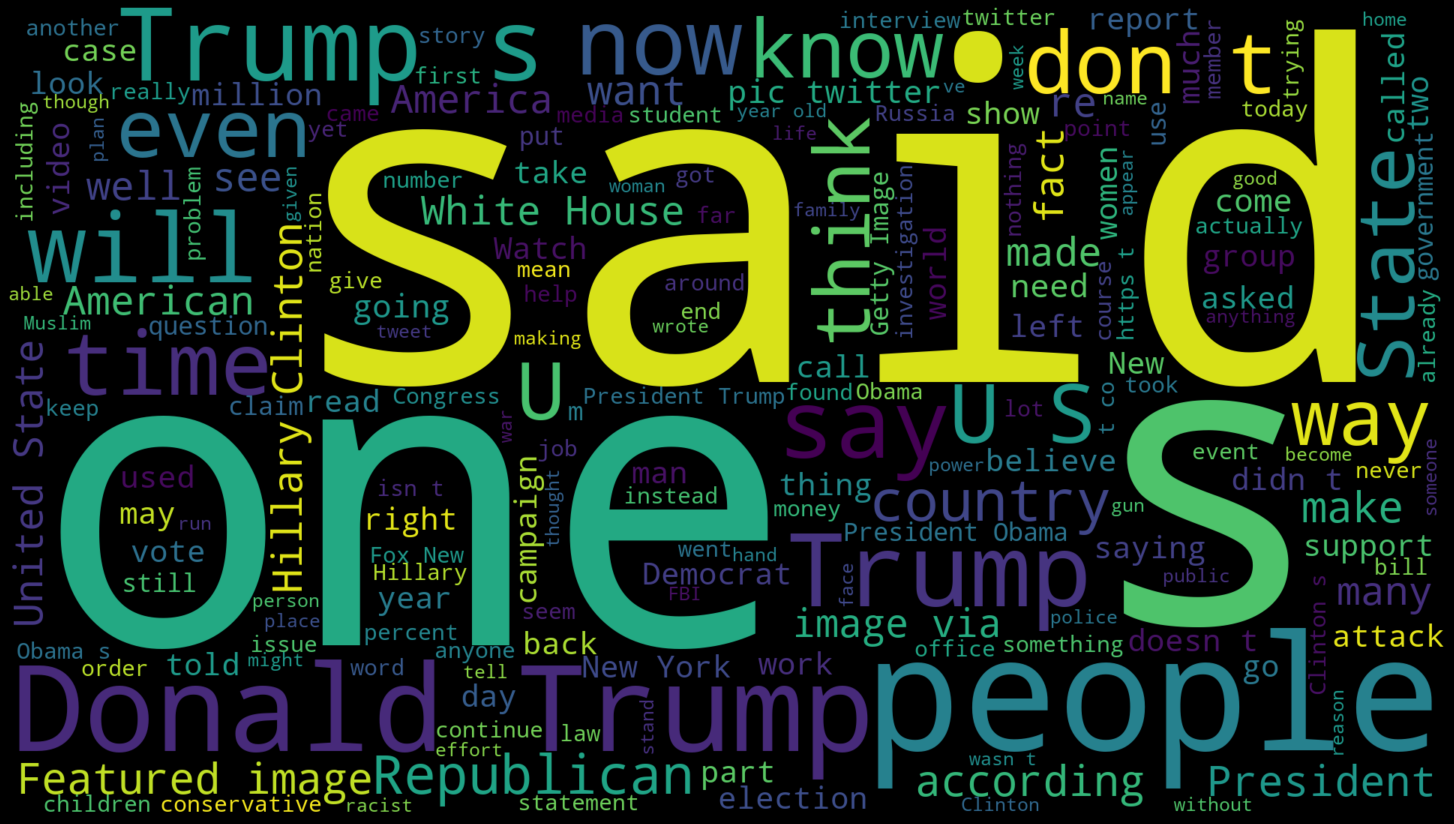

In [22]:
# Visualizing word cloud for fake data

wordcloud = WordCloud(width = 1920, height = 1080).generate(text)
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Exploring Real news dataset

In [23]:
# Reading csv file for real data values

real = pd.read_csv('/content/drive/MyDrive/UMKC_PDS/True.csv')

In [24]:
# Displaying head for real data values

real.head(3)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017

In [25]:
# Checking for any null values in real data

pd.isna(real).sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [26]:
# Converting data from series to list for real data

text = ' '.join(real['text'].tolist())

In [27]:
# Displaying subject column split in real data

true_dt_fig = px.pie(real,names='subject')
true_dt_fig.show()

In [28]:
# Visualizing histogram values for subject column and split of all unique categories in this column.

px.histogram(real, x="subject", barmode="group")

In [29]:
# Finding out most common words in real text

commonReal = Counter(" ".join(real["text"]).split()).most_common(100)
commonReal

[('the', 422622),
 ('to', 243787),
 ('of', 204339),
 ('a', 187214),
 ('and', 179411),
 ('in', 169538),
 ('on', 104807),
 ('that', 82512),
 ('for', 77867),
 ('said', 72025),
 ('The', 55109),
 ('is', 54454),
 ('with', 53018),
 ('was', 47741),
 ('by', 46908),
 ('has', 46016),
 ('as', 45182),
 ('s', 44638),
 ('he', 43493),
 ('from', 38954),
 ('U.S.', 38271),
 ('Trump', 36461),
 ('his', 36218),
 ('have', 36162),
 ('not', 35179),
 ('it', 33923),
 ('be', 33909),
 ('would', 31330),
 ('an', 31225),
 ('-', 31059),
 ('at', 30898),
 ('who', 27242),
 ('are', 25778),
 ('had', 25568),
 ('will', 24802),
 ('said.', 21582),
 ('(Reuters)', 21239),
 ('its', 20966),
 ('which', 20691),
 ('been', 19540),
 ('were', 18791),
 ('but', 18128),
 ('after', 17841),
 ('they', 17784),
 ('President', 17112),
 ('about', 16791),
 ('their', 16490),
 ('this', 16062),
 ('more', 15812),
 ('also', 15703),
 ('United', 15030),
 ('or', 15010),
 ('government', 14667),
 ('Republican', 14487),
 ('told', 14218),
 ('House', 13622),
 

In [30]:
# Splitting list into 2 parts i.e., words and frequency counts

list_true1 = []
list_true2 = []

for i in commonReal:
      X, y = i
      list_true1.append(X)
      list_true2.append(y)

In [31]:
x=list_true1
y=list_true2

fig = px.bar(x,x,y)
fig.show()

In [34]:
# Taking specific common words from the list of 100 and visualising them.

l1 = ['US','Trump','President','United','Government','Republican','House','People','Trumps','Against','Donald','Former','State','He','North','States','White','Percent','Presidental','Campaign','Senate','Democratic','First','Since']
l2 = ['38271','36461','17112','15030','14667','14487','13622','11702','11582','10869','10263','9904','9057','9050','9035','8687','8472','7969','7850','7846','7702','7645','7605','7376']

fig = px.bar(l1,l1,l2,height=400)
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.show()

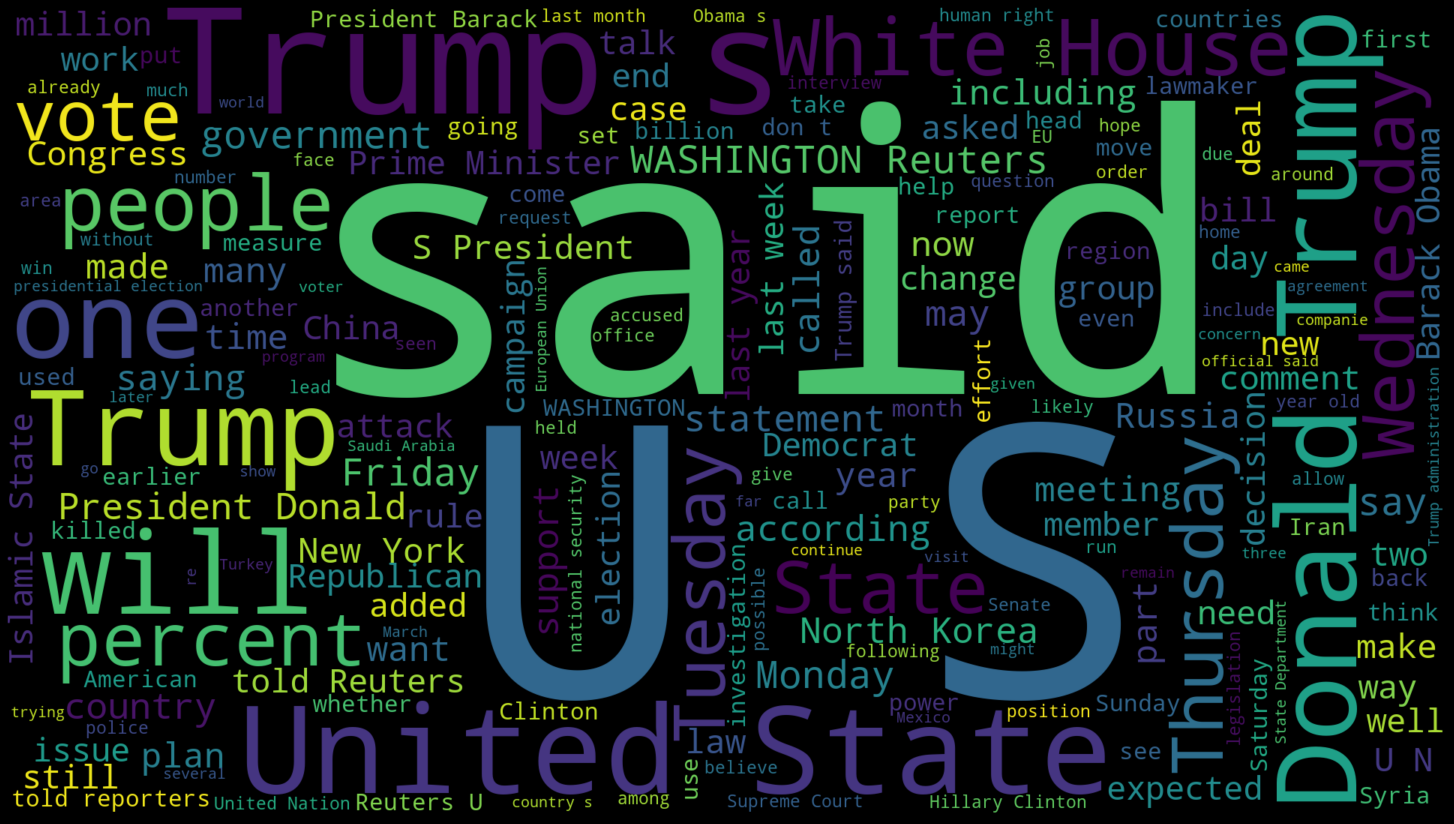

In [32]:
# Visualizing word cloud for real data

wordcloud = WordCloud(width = 1920, height = 1080).generate(text)
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Cleaning data 

In [35]:
# Displaying all data in format of array.

real.text.values

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [36]:
# creating list of indices which do not have publication information, by breaking text by '-' as this is a common pattern.

unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [37]:
# All unknown_publishers values in data

len(unknown_publishers)

222

In [38]:
# Displaying all values that have unknown_publishers.

real.iloc[unknown_publishers]

title  \
7      Factbox: Trump on Twitter (Dec 29) - Approval ...   
8             Trump on Twitter (Dec 28) - Global Warming   
12     Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13        Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14     Man says he delivered manure to Mnuchin to pro...   
...                                                  ...   
20135  China's big money trumps U.S. influence in Cam...   
20500  UK publisher rejected request to block academi...   
20667  Rohingya say their village is lost to Myanmar'...   
21246  'Gates of Hell': Iraqi army says fighting near...   
21339  Indian court's privacy ruling is blow to gover...   

                                                    text       subject  \
7      The following statements were posted to the ve...  politicsNews   
8      The following statements were posted to the ve...  politicsNews   
12     The following statements were posted to the ve...  politicsNews   
13     The following statements were posted to the ve...  politicsNews   
14      (In Dec. 25 story, in second paragraph, corre...  politicsNews   
...                                                  ...           ...   
20135   (Story corrects to million from billion in pa...     worldnews   
20500   (This Sept 8 story corrects headline, clarifi...     worldnews   
20667   (Story refiles to add dropped word  not , in ...     worldnews   
21246   (Story corrects third paragraph to show Mosul...     worldnews   
21339   (Story corrects to fix spelling in paragraph ...     worldnews   

                      date  
7       December 29, 2017   
8       December 29, 2017   
12      December 28, 2017   
13      December 28, 2017   
14      December 25, 2017   
...                    ...  
20135  September 11, 2017   
20500   September 8, 2017   
20667   September 7, 2017   
21246     August 29, 2017   
21339     August 24, 2017   

[222 rows x 4 columns]

In [39]:
# Unknown_publishers values in text format

real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [40]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [41]:
# Dropping unwanted values.

real = real.drop(8970, axis=0)

In [42]:
# Splitting all unknown_publishers values with a seperator and appending that value in specified column i.e., publisher

publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [43]:
# Creating new columns publisher and text using the temp variable used in above cell

real['publisher']=publisher
real['text'] = tmp_text

In [44]:
# Displaying head values for new publisher values after changes performed

real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  The head of a conservative Republican faction ...  politicsNews   
1  Transgender people will be allowed for the fir...  politicsNews   
2  The special counsel investigation of links bet...  politicsNews   
3  Trump campaign adviser George Papadopoulos tol...  politicsNews   
4  President Donald Trump called on the U.S. Post...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [45]:
# Visualising shape of real data 

real.shape

(21416, 5)

In [46]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [47]:
fake.iloc[empty_fake_index]

title text    subject  \
10923  TAKE OUR POLL: Who Do You Think President Trum...        politics   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...        politics   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...        politics   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...        politics   
11236  SHOCKER: Public School Turns Computer Lab Into...        politics   
...                                                  ...  ...        ...   
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
10923  May 10, 2017  
11041  Apr 26, 2017  
11190   Apr 6, 2017  
11225   Apr 2, 2017  
11236   Apr 1, 2017  
...             ...  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015  

[630 rows x 4 columns]

In [48]:
# Joining required column data with one another i.e., text and title

real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [49]:
# Converting all values to lower

real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# Preprocessing 

In [50]:
# Setting class for real and fake data
# 0 -> Fake
# 1 -> Real

real['class'] = 1
fake['class'] = 0

In [51]:
# Taking only necessary columns

real = real[['text', 'class']]
fake = fake[['text', 'class']]

In [52]:
# Combining real and fake data together

data = real.append(fake, ignore_index=True)

In [53]:
data.sample(5)

text  class
19095  game over for 'discredited' catalan referendum...      1
37908  all whites in back…democrats prove their obses...      0
6264   texas planned parenthood asks judge to block m...      1
15586  airport video shows north korean embassy offic...      1
29106   trump voicemail hacked, reveals very close re...      0

In [54]:
# Selecting only letters using regeular expressions.

#data['text'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))

In [55]:
# Removing all stop words from the text data. Punctuation and special character removal

stop_words = set(stopwords.words('english'))
to_remove = ['•', '!', '"', '#', '”', '“', '$', '%', '&', "'", '–', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '…']
stop_words.update(to_remove)
print('Number of stopwords:', len(stop_words))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = (" ").join([word for word in text.split() if not word in stop_words])
    text = "".join([char for char in text if not char in to_remove])
    return text

data['text'] = data['text'].apply(clean_text)

Number of stopwords: 226


# Word 2 Vector

In [56]:
data.head()

text  class
0  us budget fight looms republicans flip fiscal ...      1
1  us military accept transgender recruits monday...      1
2  senior us republican senator let mr mueller jo...      1
3  fbi russia probe helped australian diplomat ti...      1
4  trump wants postal service charge much more am...      1

In [57]:
# Converting text to numeric data using w2v 

y = data['class'].values

In [58]:
# Converting data to list

X = [d.split() for d in data['text'].tolist()]

In [59]:
# Checking type of data as we converted it to list from array.

type(X[0])

list

In [60]:
# Visualising if the conversion is done as expected from array to list

print(X[0])

['us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'head', 'conservative', 'republican', 'faction', 'us', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'cbs’', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'big', 'budget', 'increase', 'military', 'spending', 'democrats', 'also', 'want', 'proportional', 'increases', 'nondefen

In [61]:
# DIM is set to 100, which means each of the words in the list is converted into 100 vectors.
# Creating w2v model using gensim package (X is list of list, dimensions, window says how it will provide the vectors to us)

DIM = 100

w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [62]:
# Checking length of word to vector list created

len(w2v_model.wv.vocab)

216615

In [63]:
# Visualising all the word 2 vector model vocabulary. These are words with their equivalent vectors

w2v_model.wv.vocab

{'us': <gensim.models.keyedvectors.Vocab at 0x7fd49878b710>,
 'budget': <gensim.models.keyedvectors.Vocab at 0x7fd4814c1710>,
 'fight': <gensim.models.keyedvectors.Vocab at 0x7fd494884610>,
 'looms': <gensim.models.keyedvectors.Vocab at 0x7fd4948ff390>,
 'republicans': <gensim.models.keyedvectors.Vocab at 0x7fd4948fb050>,
 'flip': <gensim.models.keyedvectors.Vocab at 0x7fd4948fbe10>,
 'fiscal': <gensim.models.keyedvectors.Vocab at 0x7fd4948fbd90>,
 'script': <gensim.models.keyedvectors.Vocab at 0x7fd4948fb410>,
 'head': <gensim.models.keyedvectors.Vocab at 0x7fd4948fbf10>,
 'conservative': <gensim.models.keyedvectors.Vocab at 0x7fd4948fb190>,
 'republican': <gensim.models.keyedvectors.Vocab at 0x7fd45da69c50>,
 'faction': <gensim.models.keyedvectors.Vocab at 0x7fd45da69ad0>,
 'congress': <gensim.models.keyedvectors.Vocab at 0x7fd45da69b90>,
 'voted': <gensim.models.keyedvectors.Vocab at 0x7fd45da693d0>,
 'month': <gensim.models.keyedvectors.Vocab at 0x7fd45da69090>,
 'huge': <gensim.mo

In [64]:
# Checking if the specified vocabulary or word is present in the w2v model 

w2v_model.wv['science']

array([-1.6030610e+00, -1.7663045e+00,  1.7850001e+00, -1.5434719e+00,
       -1.1706111e+00,  3.0438690e+00, -1.6844174e+00, -5.5547154e-01,
        4.9493548e-01, -7.5751305e-01, -2.8915173e-01,  3.5079606e+00,
        1.4713911e+00, -3.1098983e+00,  2.0110915e+00, -3.2139543e-01,
       -1.7287771e+00, -9.2092741e-01,  6.1022758e-01,  6.6516823e-01,
       -2.0719209e+00,  2.6897055e-01,  3.0918307e+00, -7.5609648e-01,
       -2.1298010e+00,  3.5204055e+00,  1.1717039e+00,  1.5575980e+00,
        3.0905414e-01, -1.7913183e+00,  1.6193806e+00,  2.3811851e+00,
        1.5337991e+00,  6.7739320e-01,  4.9378264e-01, -2.2138081e+00,
       -8.4818512e-01, -2.8898957e-01, -1.0881082e+00,  1.9440001e+00,
        2.7163327e+00, -2.0479002e+00,  1.0918546e+00,  1.9836239e+00,
       -4.2957371e-01,  2.6145582e+00, -1.1445525e+00,  1.6234847e+00,
       -1.0408739e+00, -3.2250032e+00, -1.4424844e+00, -6.7999339e-01,
       -4.0313524e-01,  2.7597897e+00, -8.4308821e-01, -4.6706749e-03,
      

In [65]:
# Checking for most similar and most frequently seen vocabulary together to get a better idea of the model and w2v in place

w2v_model.wv.most_similar('science')

[('scientific', 0.7501581907272339),
 ('scientist', 0.7118061184883118),
 ('scientists', 0.6981996297836304),
 ('studies', 0.6651681661605835),
 ('earthclaim', 0.6587228178977966),
 ('harchaoui', 0.6404990553855896),
 ('mit', 0.6337119936943054),
 ('evolution', 0.630179762840271),
 ('jalel', 0.6246143579483032),
 ('archaeology', 0.6139477491378784)]

In [66]:
# Tokenising the model and fitting it on X.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [67]:
# Converting or tokenising texts to sequences 

X = tokenizer.texts_to_sequences(X)

In [68]:
X

[[3,
  365,
  370,
  10419,
  52,
  7950,
  1243,
  5016,
  312,
  200,
  17,
  6135,
  3,
  99,
  664,
  171,
  988,
  2818,
  43,
  836,
  341,
  94,
  1066,
  86,
  1243,
  200,
  238,
  989,
  365,
  7608,
  1624,
  3269,
  7762,
  76,
  218,
  52,
  3,
  687,
  798,
  7643,
  562,
  16658,
  366,
  264,
  1619,
  447,
  477,
  80,
  581,
  304,
  16903,
  1221,
  301,
  667,
  7890,
  109,
  304,
  1305,
  248,
  812,
  80,
  365,
  370,
  202,
  1815,
  319,
  210,
  113,
  34,
  404,
  457,
  27,
  1900,
  1367,
  52,
  955,
  274,
  247,
  99,
  5,
  12,
  2,
  52,
  92,
  279,
  365,
  842,
  82,
  581,
  107,
  10,
  92,
  11954,
  3422,
  16659,
  12711,
  581,
  893,
  62,
  874,
  3987,
  970,
  1329,
  78,
  204,
  1252,
  1078,
  198,
  2,
  66,
  192,
  1217,
  41,
  28293,
  53,
  842,
  16659,
  12711,
  581,
  121938,
  7643,
  479,
  647,
  3336,
  11,
  659,
  1988,
  1,
  228,
  346,
  107,
  93,
  1659,
  349,
  130,
  277,
  15,
  341,
  1148,
  54,
  1243,
  20

In [69]:
# Visualsing word_index after tokenising

tokenizer.word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'state': 8,
 'new': 9,
 'also': 10,
 'house': 11,
 'donald': 12,
 'clinton': 13,
 'obama': 14,
 'government': 15,
 'states': 16,
 'republican': 17,
 'could': 18,
 'white': 19,
 'told': 20,
 'united': 21,
 'like': 22,
 'campaign': 23,
 'news': 24,
 'last': 25,
 'two': 26,
 'election': 27,
 'time': 28,
 'party': 29,
 'first': 30,
 'former': 31,
 'year': 32,
 'hillary': 33,
 'even': 34,
 'country': 35,
 'many': 36,
 'years': 37,
 'media': 38,
 'security': 39,
 'may': 40,
 'say': 41,
 'political': 42,
 'national': 43,
 'police': 44,
 'get': 45,
 'law': 46,
 'made': 47,
 'court': 48,
 'make': 49,
 'american': 50,
 'since': 51,
 'republicans': 52,
 'going': 53,
 'percent': 54,
 'bill': 55,
 'presidential': 56,
 'back': 57,
 'says': 58,
 'russia': 59,
 'north': 60,
 'senate': 61,
 'support': 62,
 'vote': 63,
 'democratic': 64,
 'it': 65,
 'administration': 66,
 'trump’s': 67,
 'america': 68,
 'week': 69

In [70]:
# Visualising all the words based on their occurance

px.histogram([len(x) for x in X])

In [71]:
# Visualising length of array

nos = np.array([len(x) for x in X])
len(nos[nos>1000])

300

In [72]:
# Setting max length and pad_sequences

maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [73]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [74]:
from gensim.models.fasttext import Vocab
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [75]:
embedding_vectors = get_weight_matrix(w2v_model)

In [76]:
embedding_vectors.shape

(216616, 100)

In [77]:
# Creating the model 

model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [78]:
# Looking at summary of created model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         21661600  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 21,778,977
Trainable params: 117,377
Non-trainable params: 21,661,600
_________________________________________________________________


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [80]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 45s 53ms/step - loss: 0.1315 - acc: 0.9524 - val_loss: 0.0878 - val_acc: 0.9690
Epoch 2/6
737/737 [==============================] - 39s 53ms/step - loss: 0.0669 - acc: 0.9770 - val_loss: 0.0865 - val_acc: 0.9724
Epoch 3/6
737/737 [==============================] - 37s 51ms/step - loss: 0.0463 - acc: 0.9846 - val_loss: 0.0411 - val_acc: 0.9857
Epoch 4/6
737/737 [==============================] - 41s 55ms/step - loss: 0.0317 - acc: 0.9896 - val_loss: 0.0475 - val_acc: 0.9857
Epoch 5/6
737/737 [==============================] - 37s 51ms/step - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0408 - val_acc: 0.9864
Epoch 6/6
737/737 [==============================] - 39s 53ms/step - loss: 0.0098 - acc: 0.9972 - val_loss: 0.0312 - val_acc: 0.9897


In [81]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 7s 18ms/step


In [82]:
accuracy_score(y_test, y_pred)

0.991358574610245

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5907
           1       0.99      0.99      0.99      5318

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [84]:
X_test

array([[     0,      0,      0, ...,   8783,    236,    190],
       [     0,      0,      0, ...,   1874,    623,    959],
       [     0,      0,      0, ..., 211636,     50,    875],
       ...,
       [     0,      0,      0, ...,     53,     20,  18629],
       [     0,      0,      0, ...,  22603,    104,   3693],
       [     0,      0,      0, ...,     27,   1121,      1]], dtype=int32)

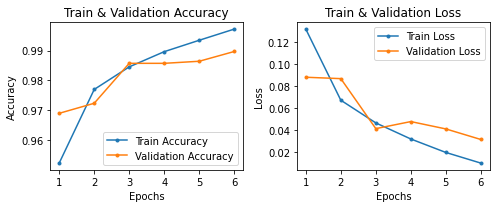

In [85]:
def plot_loss_epochs(history):
    epochs = np.arange(1,len(history.history['acc']) + 1,1)
    train_acc = history.history['acc']
    train_loss = history.history['loss']
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']

    fig , ax = plt.subplots(1,2, figsize=(7,3))
    ax[0].plot(epochs , train_acc , '.-' , label = 'Train Accuracy')
    ax[0].plot(epochs , val_acc , '.-' , label = 'Validation Accuracy')
    ax[0].set_title('Train & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , '.-' , label = 'Train Loss')
    ax[1].plot(epochs , val_loss , '.-' , label = 'Validation Loss')
    ax[1].set_title('Train & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    fig.tight_layout()
    fig.show()
    
plot_loss_epochs(history)

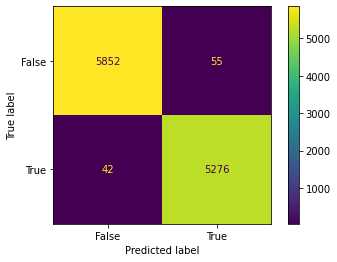

In [86]:
cm = confusion_matrix(y_test,y_pred)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Model testing and prediction

In [87]:
def predictData(sourceData):
  sourceData = tokenizer.texts_to_sequences(sourceData)
  sourceData = pad_sequences(sourceData, maxlen=maxlen)
  final_value = (model.predict(sourceData)>=0.5).astype(int)

  if final_value == 0:
    print("FAKE NEWS DETECTED")
  else:
    print("REAL NEWS")

In [88]:
predictData(['A US official confirmed to CNN that Blome was summoned by Pakistan’s foreign ministry following Biden’s remarks. Those remarks frustrated US diplomats in the region, the US official said.'])

1/1 [==============================] - 0s 45ms/step
REAL NEWS


In [89]:
predictData(['elon musk buys oracle, puts java out of use and shuts down company'])

1/1 [==============================] - 0s 44ms/step
FAKE NEWS DETECTED


In [90]:
# sourceData = ['Elon musk buys mercedes, runs car manufacturer to ground, Photo by David Blaine/Getty images']

# sourceData = tokenizer.texts_to_sequences(sourceData)
# sourceData = pad_sequences(sourceData, maxlen=maxlen)

In [91]:
#sourceData1 = ['A US official confirmed to CNN that Blome was summoned by Pakistan’s foreign ministry following Biden’s remarks. Those remarks frustrated US diplomats in the region, the US official said.']


In [92]:
# final_value = (model.predict(sourceData)>=0.5).astype(int)

# if final_value == 0:
#   print("FAKE NEWS DETECTED")
# else:
#   print("REAL NEWS")